<a href="https://colab.research.google.com/github/Bhandari007/Timeseries-and-sequence-models/blob/main/C4_W1_Lab1_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time Series Plots
This notebook aims to show different terminologies and attribues of a time series by generating and plotting synthetic data.

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Utilities

In [2]:
def plot_series(time, series, format = "-", start = 0, end = None, label = None):
  """
  Visualize time series data

  Args:
    time (array of int) - contains the time steps
    series (array of int) - contains the measurements for each time step
    format (string) - line style when plotting the graph
    start (int) - first time step to plot
    end (int) - last time step to plot
    label (list of strings) - tag for the line
  """

  # Setup dimensions of the graph figure
  plt.figure(figsize = (10,6))

  # Plot the time series data
  plt.plot(time[start:end], series[start:end], format)

  # Label the x-axis
  plt.xlabel("Time")

  # Label the y-axis
  plt.ylabel("Value")

  if label:
    plt.legend(fontsize = 14, labels = label)
  
  # Overlay a grid on the graph
  plt.grid(True)

  # Draw the graph on screen
  plt.show()

# Trend

The *trend* describes the general tendency of the values to go up or down as time progresses. Given a certain time period, we can  if the graph is following an upward/positive trend, downward/negative trend, or just flat. For instance, the housing prices in a good location can see a general increase in valuation as time passes.

The simplest example to visualize is data that follows a straight line.

In [3]:
def trend(time, slop = 0):
  """
  Generates synthetic data that follows a straight line given a slope values.
  
  Args:
    time (array of int) - contains the time steps
    slope (float) - determines the direction and steepness of the line
  
  Returns:
    series (array of float) - measurements that follow a straight line
  """

  # Compute the linear series given the shape
  series = slope * time
  
  return series

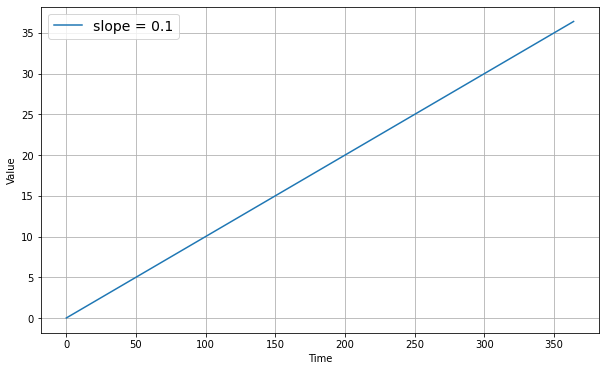

In [6]:
# Generate time steps
time = np.arange(365)

# Define the slope
slope = 0.1

# Generate measurements with the defined slope
series = trend(time, slope)

# Plot the results
plot_series(time, series, label = [f'slope = {slope}'])

# Seasonality

Another attribute we may want to look for is seasonality. This refers to a recurring pattern at regular time intervals. For instance, the hourly temprature might oscillate similarly for 10 consecutive dats and we can use that to predict the behaviour on the next day.

In [9]:
def seasonal_pattern(season_time):
  """
  Just an arbitrary pattern, we can change it if we wish

  Args:
    season_time (array of float) - contains the measurement per time step

  Returns:
    data_pattern (array of float) - contains revised measurement values according to the defined pattern

  """

  # Generate the values using an arbitrary pattern
  data_pattern = np.where(season_time < 0.4,
                           np.cos(season_time * 2 *np.pi),
                                  1 / np.exp(3* season_time))
  
  return data_pattern

def seasonality(time, period, amplitude = 1, phase = 0):
  """
  Repeats the same pattern at each peroid

  Args:
    time (array of int) - contains the time steps
    period (int) - number of time steps before the pattern repeats
    amplitude (int) - peak measured value in a period
    phase (int) - number of time steps to shift the measured values

  Returns:
    data_pattern (array of float) - seasonal data scaled by the amplitude
  """

  # Define the measured values per second
  season_time = ((time + phase) % period) / period

  # Generates the seasonal data scaled by the defined amplitude
  data_pattern = amplitude * seasonal_pattern(season_time)

  return data_pattern


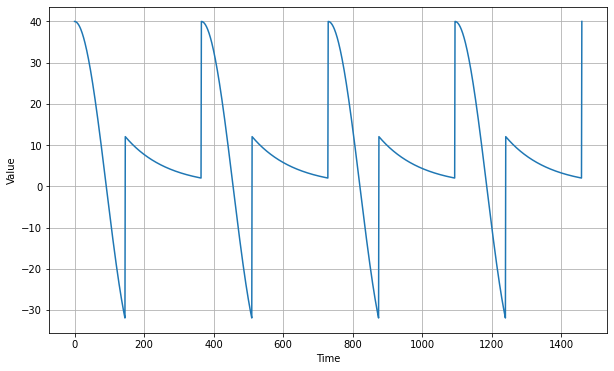

In [10]:
# Generate time steps
time = np.arange(4 * 365 + 1)

# Define the parameters of the seasonal data
period = 365
amplitude = 40

# Generate the seasonal data
series = seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

# Seasonality + Trend

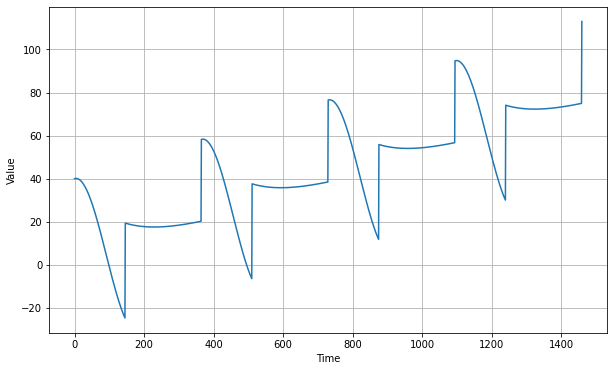

In [11]:
# Define seasonal parameters
slope = 0.05
period = 365
amplitude = 40

# Generate the data
series = trend(time, slope) + seasonality(time, period=period, amplitude=amplitude)

# Plot the results
plot_series(time, series)

# Noise

In [12]:
def noise(time, noise_level=1, seed=None):
    """Generates a normally distributed noisy signal

    Args:
      time (array of int) - contains the time steps
      noise_level (float) - scaling factor for the generated signal
      seed (int) - number generator seed for repeatability

    Returns:
      noise (array of float) - the noisy signal

    """

    # Initialize the random number generator
    rnd = np.random.RandomState(seed)

    # Generate a random number for each time step and scale by the noise level
    noise = rnd.randn(len(time)) * noise_level
    
    return noise

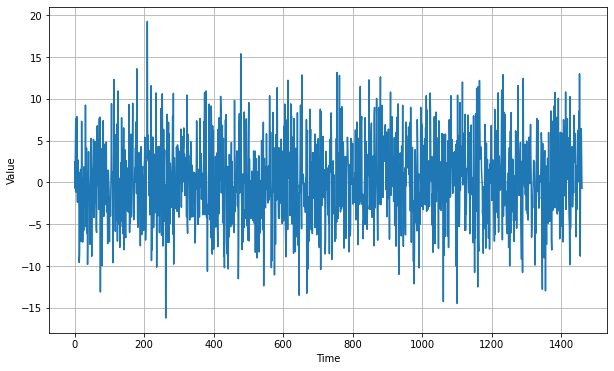

In [13]:
# Define noise level
noise_level = 5

# Generate noisy signal
noise_signal = noise(time, noise_level=noise_level, seed=42)

# Plot the results
plot_series(time, noise_signal)

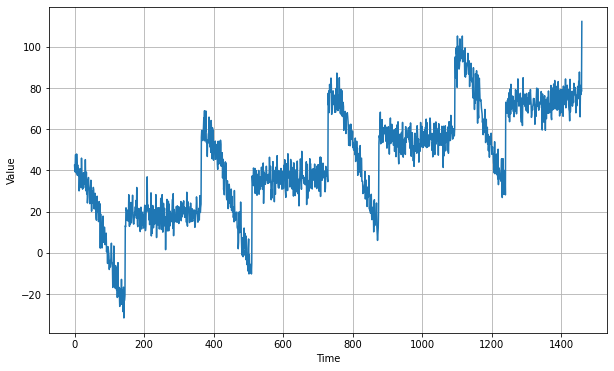

In [14]:
# Add the noise to the time series
series += noise_signal

# Plot the results
plot_series(time, series)

# Autocorrelation

Time series can also be correlated. This means that measurements at a given time step is a function of previous time steps. 

In [15]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)
    
    # Initialize array of random numbers equal to the length 
    # of the given time steps plus 50
    ar = rnd.randn(len(time) + 50)
    
    # Set first 50 elements to a constant
    ar[:50] = 100
    
    # Define scaling factors
    phi1 = 0.5
    phi2 = -0.1

    # Autocorrelate element 51 onwards with the measurement at 
    # (t-50) and (t-30), where t is the current time step
    for step in range(50, len(time) + 50):
        ar[step] += phi1 * ar[step - 50]
        ar[step] += phi2 * ar[step - 33]
    
    # Get the autocorrelated data and scale with the given amplitude.
    # The first 50 elements of the original array is truncated because
    # those are just constant and not autocorrelated.
    ar = ar[50:] * amplitude

    return ar

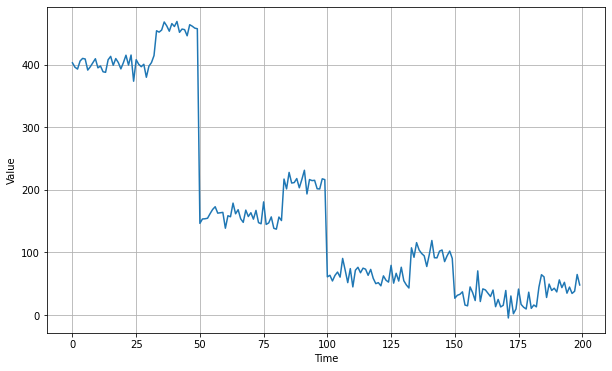

In [16]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the first 200 elements to see the pattern more clearly
plot_series(time[:200], series[:200])

In [17]:
def autocorrelation(time, amplitude, seed=None):
    """
    Generates autocorrelated data

    Args:
      time (array of int) - contains the time steps
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Initialize array of random numbers equal to the length 
    # of the given time steps plus an additional step
    ar = rnd.randn(len(time) + 1)

    # Define scaling factor
    phi = 0.8

    # Autocorrelate element 11 onwards with the measurement at 
    # (t-1), where t is the current time step
    for step in range(1, len(time) + 1):
        ar[step] += phi * ar[step - 1]
    
    # Get the autocorrelated data and scale with the given amplitude.
    ar = ar[1:] * amplitude
    
    return ar

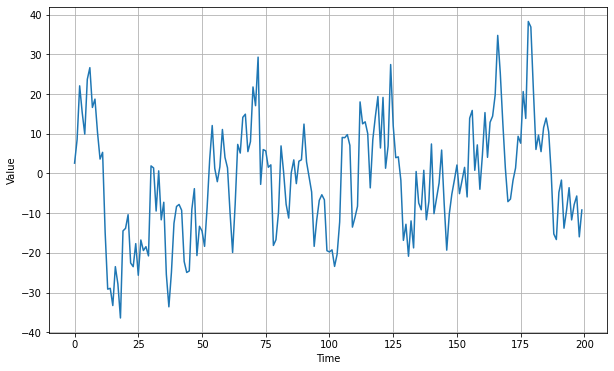

In [18]:
# Use time steps from previous section and generate autocorrelated data
series = autocorrelation(time, amplitude=10, seed=42)

# Plot the results
plot_series(time[:200], series[:200])

Another autocorrelated time series we might encounter is one where it decays predictably after random spikes.

In [19]:
def impulses(time, num_impulses, amplitude=1, seed=None):
    """
    Generates random impulses

    Args:
      time (array of int) - contains the time steps
      num_impulses (int) - number of impulses to generate
      amplitude (float) - scaling factor
      seed (int) - number generator seed for repeatability

    Returns:
      series (array of float) - array containing the impulses
    """

    # Initialize random number generator 
    rnd = np.random.RandomState(seed)

    # Generate random numbers
    impulse_indices = rnd.randint(len(time), size=num_impulses)

    # Initialize series
    series = np.zeros(len(time))

    # Insert random impulses
    for index in impulse_indices:
        series[index] += rnd.rand() * amplitude

    return series

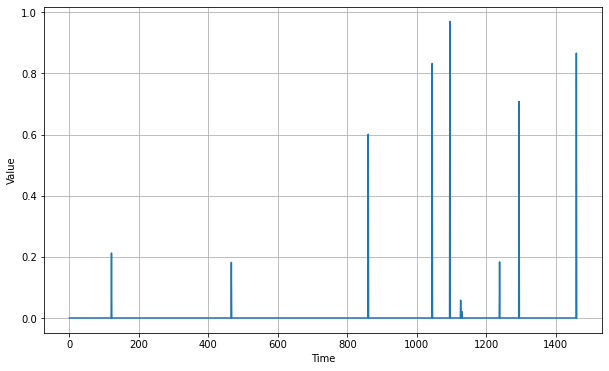

In [20]:
# Generate random impulses
impulses_signal = impulses(time, num_impulses=10, seed=42)

# Plot the results
plot_series(time, impulses_signal)

In [21]:
def autocorrelation_impulses(source, phis):
    """
    Generates autocorrelated data from impulses

    Args:
      source (array of float) - contains the time steps with impulses
      phis (dict) - dictionary containing the lag time and decay rates

    Returns:
      ar (array of float) - generated autocorrelated data
    """

    # Copy the source
    ar = source.copy()

    # Compute new series values based on the lag times and decay rates
    for step, value in enumerate(source):
        for lag, phi in phis.items():
            if step - lag > 0:
              ar[step] += phi * ar[step - lag]

    return ar

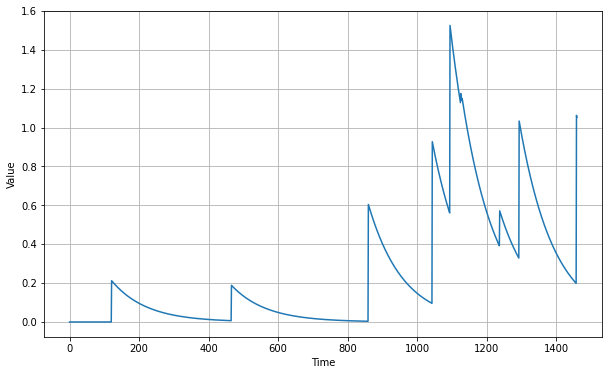

In [22]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.99})

# Plot the results
plot_series(time, series)

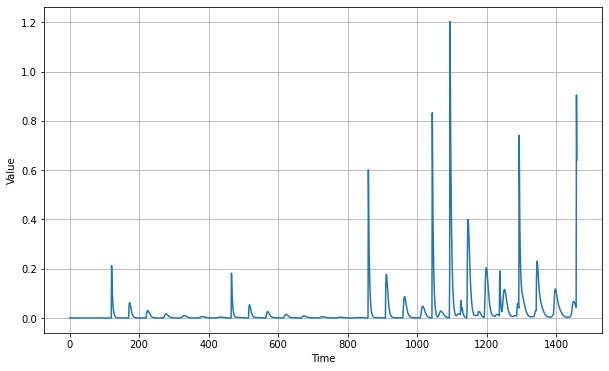

In [23]:
# Use the impulses from the previous section and generate autocorrelated data
series = autocorrelation_impulses(impulses_signal, {1: 0.70, 50: 0.2})

# Plot the results
plot_series(time, series)

Autocorrelate data can also ride a trend line

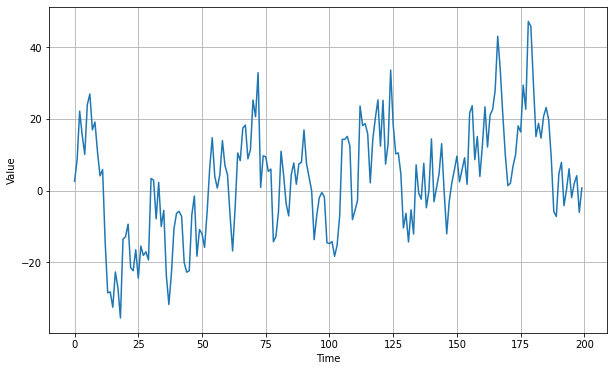

In [24]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

Similarly, seasonality can also be added to this data.

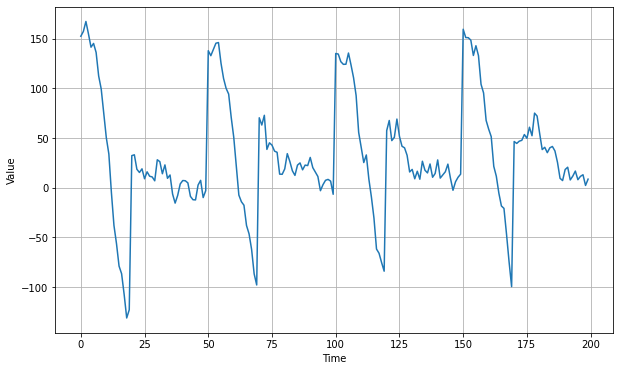

In [25]:
# Generate autocorrelated data with an upward trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Plot the results
plot_series(time[:200], series[:200])

# Non-stationary Time Series

It is also possible for the time series to break an expected pattern. 

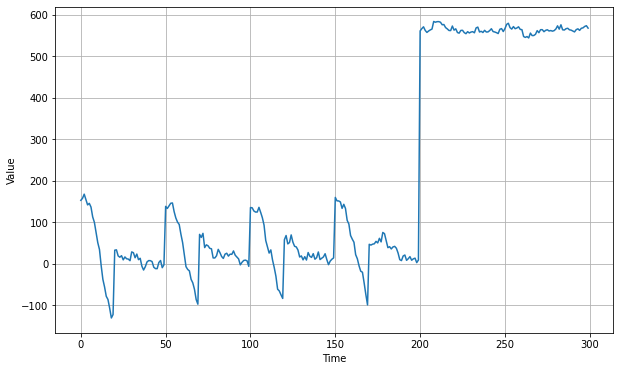

In [26]:
# Generate data with positive trend
series = autocorrelation(time, 10, seed=42) + seasonality(time, period=50, amplitude=150) + trend(time, 2)

# Generate data with negative trend
series2 = autocorrelation(time, 5, seed=42) + seasonality(time, period=50, amplitude=2) + trend(time, -1) + 550

# Splice the downward trending data into the first one at time step = 200
series[200:] = series2[200:]

# Plot the result
plot_series(time[:300], series[:300])